# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [52]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [41]:
sinasc_raw['munResLat'].sort_values(ascending=True).dropna()

25681   -13.49976
25927   -13.49976
25553   -13.49976
11425   -13.49976
25965   -13.49976
           ...   
19897    -8.76889
19898    -8.76889
19899    -8.76889
19877    -8.76889
7972     -8.76889
Name: munResLat, Length: 27027, dtype: float64

In [42]:
sinasc_raw['munResLat'].dtype

dtype('float64')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [43]:
sinasc2 = sinasc_raw[['CONSULTAS','QTDFILMORT','munResLat', 'SEXO', 'munResNome','munResArea','munResAlt']]
munResLat_fx = pd.cut((sinasc2['munResLat']), [-14, -10.5, -8])
sinasc2.pivot_table(values=['QTDFILMORT', 'CONSULTAS'],
                    index=[munResLat_fx,'SEXO'],
                    aggfunc=['sum','mean', 'min', 'max', 'median','var','std'],
                    observed=True).stack()



sum      mean  min   max  median  \
munResLat      SEXO                                                         
(-14.0, -10.5] Feminino  CONSULTAS   23656.0  3.701455  1.0   9.0     4.0   
                         QTDFILMORT   1528.0  0.242347  0.0  28.0     0.0   
               Masculino CONSULTAS   24336.0  3.687273  1.0   9.0     4.0   
                         QTDFILMORT   1577.0  0.242765  0.0   7.0     0.0   
(-10.5, -8.0]  Feminino  CONSULTAS   23298.0  3.453602  1.0   9.0     4.0   
                         QTDFILMORT   1790.0  0.305617  0.0   9.0     0.0   
               Masculino CONSULTAS   25356.0  3.480099  1.0   9.0     4.0   
                         QTDFILMORT   1747.0  0.278762  0.0   9.0     0.0   

                                          var       std  
munResLat      SEXO                                      
(-14.0, -10.5] Feminino  CONSULTAS   0.398494  0.631264  
                         QTDFILMORT  0.422540  0.650031  
               Masculino CONSULTAS   0.428933  0.654930  
                         QTDFILMORT  0.298100  0.545985  
(-10.5, -8.0]  Feminino  CONSULTAS   0.788433  0.887937  
                         QTDFILMORT  0.413413  0.642972  
               Masculino CONSULTAS   0.789377  0.888469  
                         QTDFILMORT  0.375998  0.613187

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [44]:
sinasc_raw['munResArea'].sort_values(ascending=True).dropna()


5469       459.978
17881      459.978
19133      459.978
5385       459.978
17832      459.978
           ...    
20067    34096.394
7348     34096.394
20069    34096.394
7342     34096.394
20709    34096.394
Name: munResArea, Length: 27027, dtype: float64

In [45]:
munResArea_fx = pd.cut((sinasc2['munResArea']), [0, 3000, 35000])
sinasc2.pivot_table(values=['QTDFILMORT', 'CONSULTAS'],
                    index=[munResArea_fx,'SEXO'],
                    aggfunc=['sum','mean', 'min', 'max', 'median','var','std'],
                    observed=True).stack()

sum      mean  min   max  median  \
munResArea    SEXO                                                         
(0, 3000]     Feminino  CONSULTAS    9369.0  3.743108  1.0   9.0     4.0   
                        QTDFILMORT    609.0  0.245763  0.0   4.0     0.0   
              Masculino CONSULTAS   10151.0  3.737482  1.0   9.0     4.0   
                        QTDFILMORT    651.0  0.243912  0.0   4.0     0.0   
(3000, 35000] Feminino  CONSULTAS   37585.0  3.534418  1.0   9.0     4.0   
                        QTDFILMORT   2709.0  0.279740  0.0  28.0     0.0   
              Masculino CONSULTAS   39541.0  3.539928  1.0   9.0     4.0   
                        QTDFILMORT   2673.0  0.264811  0.0   9.0     0.0   

                                         var       std  
munResArea    SEXO                                      
(0, 3000]     Feminino  CONSULTAS   0.354844  0.595687  
                        QTDFILMORT  0.311397  0.558030  
              Masculino CONSULTAS   0.382256  0.618268  
                        QTDFILMORT  0.296932  0.544914  
(3000, 35000] Feminino  CONSULTAS   0.666783  0.816568  
                        QTDFILMORT  0.446472  0.668185  
              Masculino CONSULTAS   0.681054  0.825260  
                        QTDFILMORT  0.347088  0.589142

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [46]:
sinasc2['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [47]:
munResAlt_fx = pd.cut((sinasc2['munResAlt']), [85, 179, 595])
sinasc2.pivot_table(values=['QTDFILMORT', 'CONSULTAS'],
                    index=[munResAlt_fx,'SEXO'],
                    aggfunc=['sum','mean', 'min', 'max', 'median','var','std'],
                    observed=True).stack()

sum      mean  min   max  median  \
munResAlt  SEXO                                                         
(85, 179]  Feminino  CONSULTAS   32135.0  3.510871  1.0   9.0     4.0   
                     QTDFILMORT   2388.0  0.289139  0.0   9.0     0.0   
           Masculino CONSULTAS   34011.0  3.520807  1.0   9.0     4.0   
                     QTDFILMORT   2328.0  0.269600  0.0   9.0     0.0   
(179, 595] Feminino  CONSULTAS   14288.0  3.734449  1.0   9.0     4.0   
                     QTDFILMORT    888.0  0.236233  0.0  28.0     0.0   
           Masculino CONSULTAS   15049.0  3.718557  1.0   9.0     4.0   
                     QTDFILMORT    947.0  0.238359  0.0   4.0     0.0   

                                      var       std  
munResAlt  SEXO                                      
(85, 179]  Feminino  CONSULTAS   0.703362  0.838667  
                     QTDFILMORT  0.389142  0.623813  
           Masculino CONSULTAS   0.706162  0.840334  
                     QTDFILMORT  0.363721  0.603093  
(179, 595] Feminino  CONSULTAS   0.351948  0.593252  
                     QTDFILMORT  0.483828  0.695577  
           Masculino CONSULTAS   0.397537  0.630506  
                     QTDFILMORT  0.278770  0.527987

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [108]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"}

In [129]:
sinasc3 = sinasc_raw[['munResNome', 'IDADEMAE','DTNASC']]
sinasc3 = sinasc3.set_index('munResNome')
sisnac4 = sinasc3.groupby(['DTNASC',imediatas])['IDADEMAE'].mean().dropna().unstack()


<AxesSubplot:xlabel='DTNASC'>

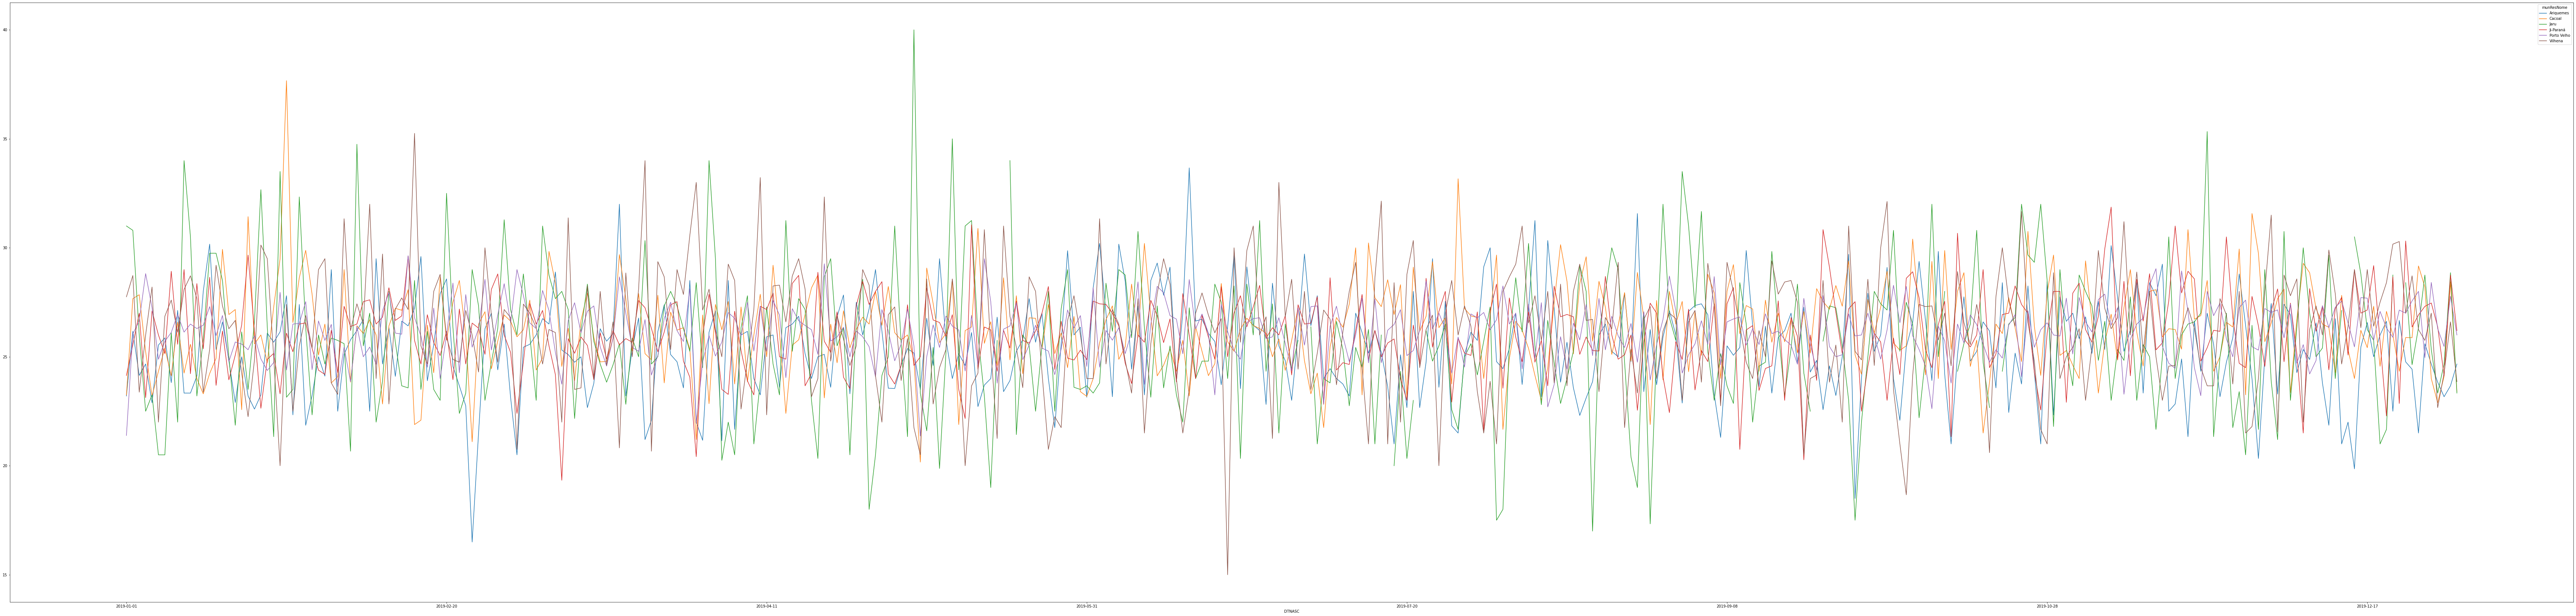

In [128]:
plt.figure(figsize=(125,60))
sns.lineplot(data=sisnac4)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.